# <font color='#AF5500'>El primer paso del proyecto es importar los datasets que nos ayudaran a la elaboracion del proyecto</font>

In [120]:
import pandas as pd

In [121]:
df = pd.read_csv("./datasets/triplets_file.csv")
df_songs = pd.read_csv("./datasets/song_data.csv")

In [122]:
df.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [123]:
df_songs.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


# <font color='#AF5500'>Ahora indagemos en los datos del dataframe principal (df) para darnos una idea con lo que estaremos trabajando</font>

In [124]:
df.user_id.nunique()

76353

In [125]:
respuestas_promedio = df.shape[0] / df.user_id.nunique()
respuestas_promedio

26.194124657839247

### <font color='#F59B46'>Vemos que en el dataframe tenemos 76353 usuarios que han respondido, los cuales han respondido en promedio 26 veces aproximadamente</font>

In [126]:
df.sort_values(by="listen_count").head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1151076,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJJYOM12A8C142CD9,1
1151075,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGZFQ12AF72A41B2,1
1151074,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOJGSFH12AB017EFC2,1
1151072,2717cf7fe16bdb5a7e5c978349395b825dc4c223,SOIPFGR12B0B8063CB,1


In [127]:
df.sort_values(by="listen_count").tail()

,user_id,song_id,listen_count
1875121,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,SOBONKR12A58A7A7E0,683
31179,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
1586780,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
1048310,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
1228366,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213


### <font color='#F59B46'>Vemos que hay usuarios que han oido una cancion desde 1 vez hasta usuarios que han escuchado una cancion mas de 2000 veces</font>

In [128]:
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [129]:
c = df['listen_count'].value_counts()
c.head()

listen_count
1    1138433
2     313043
3     142933
5      93136
4      82569
Name: count, dtype: int64

In [134]:
c.sum()

2000000

In [135]:
df['listen_count'].nunique()

295

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

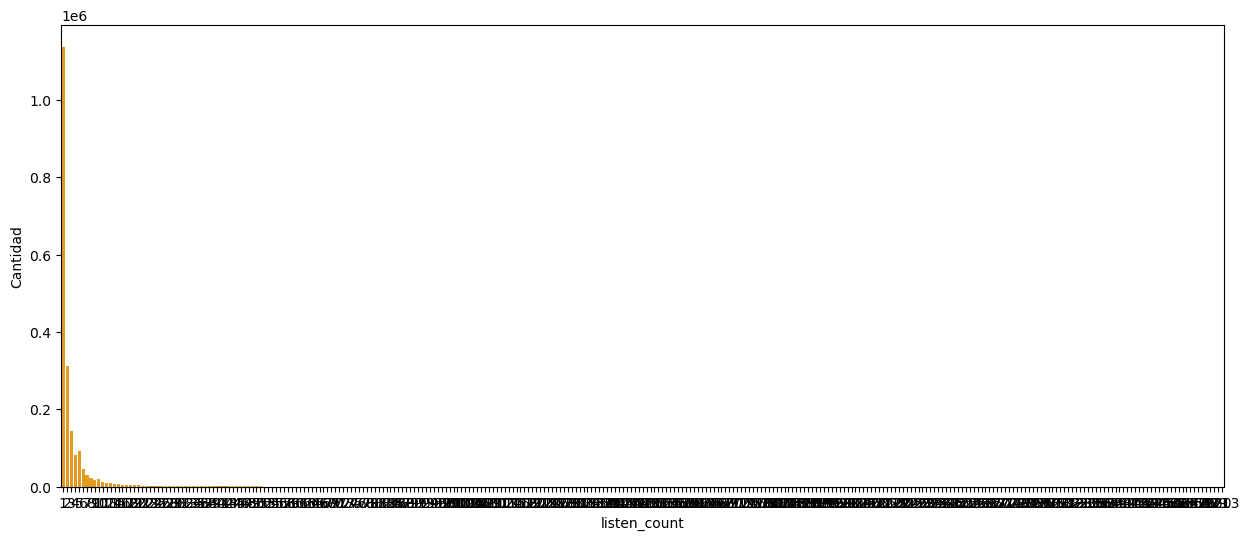

In [171]:
plt.figure(figsize=(15, 6))

sns.barplot(x=c.index, y=c, color='orange')
plt.xlabel('listen_count')
plt.ylabel('Cantidad')

plt.show()

### <font color='#F59B46'>Aqui tenemos un problema, pues tenemos una gran cantidad de 'numero de escuchadas', casi 300, por lo que para hacerlo mas general y hacer recomendaciones mas generales, haremos rangos de estas escuchadas por cancion. Sin embargo no los podemos hacer simplemente dividiendo las respuestas en n rangos, tenemos que tomar en cuenta aquellos usuarios que nos sirven, es decir, ignorar los casos aislados para dar mejores rangos de calificacion</font>

### <font color='#F59B46'>Para eso analicemos como son las respuestas de la mayoria de los usuarios</font>

In [138]:
analisis = df.groupby('user_id')['listen_count'].aggregate([sum,'count','mean'])
analisis.head()

#sum -> la suma de las veces que han escuchado una cancion
#count -> el numero de canciones que han escuchado
#mean -> la las veces promedio que escuchan una cancion

,sum,count,mean
user_id,,,
00003a4459f33b92906be11abe0e93efc423c0ff,17,7,2.428571
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,6,5,1.200000
00030033e3a2f904a48ec1dd53019c9969b6ef1f,24,9,2.666667
0007235c769e610e3d339a17818a5708e41008d9,30,10,3.000000
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,10,9,1.111111


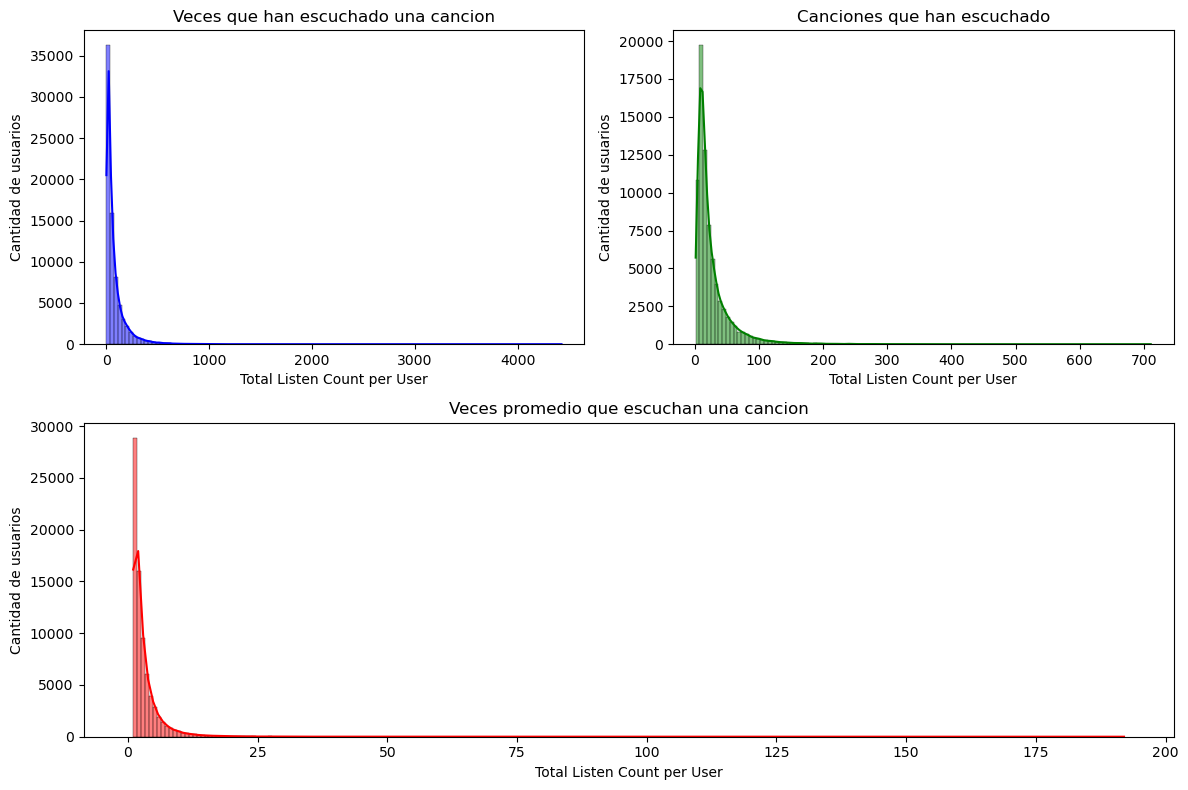

In [139]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 2, height_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.histplot(analisis['sum'], bins=120, kde=True, ax=ax1, color='blue')
ax1.set_xlabel('Total Listen Count per User')
ax1.set_ylabel('Cantidad de usuarios')
ax1.set_title('Veces que han escuchado una cancion')

sns.histplot(analisis['count'], bins=120, kde=True, ax=ax2, color='green')
ax2.set_xlabel('Total Listen Count per User')
ax2.set_ylabel('Cantidad de usuarios')
ax2.set_title('Canciones que han escuchado')

sns.histplot(analisis['mean'], bins=250, kde=True, ax=ax3, color='red')
ax3.set_xlabel('Total Listen Count per User')
ax3.set_ylabel('Cantidad de usuarios')
ax3.set_title('Veces promedio que escuchan una cancion')

plt.tight_layout()

plt.show()

### <font color='#F59B46'>Como podemos observar la mayoria de los usuarios en promedio escuchan de 1 a 15 veces una cancion, por lo que de ahi nos podremos basar para construir nuestras calificaciones, tomando en cuenta las escuchadas de 1 a 15 y aquellos que hayan escuchado cientos o miles de veces canciones, evitarlos, es decir, ignorar casos muy aislados.</font>

In [144]:
#bins = [0, 3, 10, 20, 30, 40, 50, 100, 200, 500, float('inf')] Manera incorrecta
#bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214] Manera incorrecta

bins = [1, 2, 3, 4, 6, 8, 10, 12, 14, 16, 2214]

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['calificacion'] = pd.cut(df['listen_count'], bins=bins, labels=labels, right=False)

df.head()

,user_id,song_id,listen_count,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,1


In [145]:
#rectificamos que la nueva columan sea de numeros

df['calificacion'] = df['calificacion'].astype(int)

type(df['calificacion'][0])

numpy.int64

In [161]:
d = pd.Series(df['calificacion'].value_counts())
d

calificacion
1     1138433
2      313043
4      175705
3      142933
5       76552
10      51245
6       39297
7       31452
8       17906
9       13434
Name: count, dtype: int64

In [162]:
df['calificacion'].nunique()

10

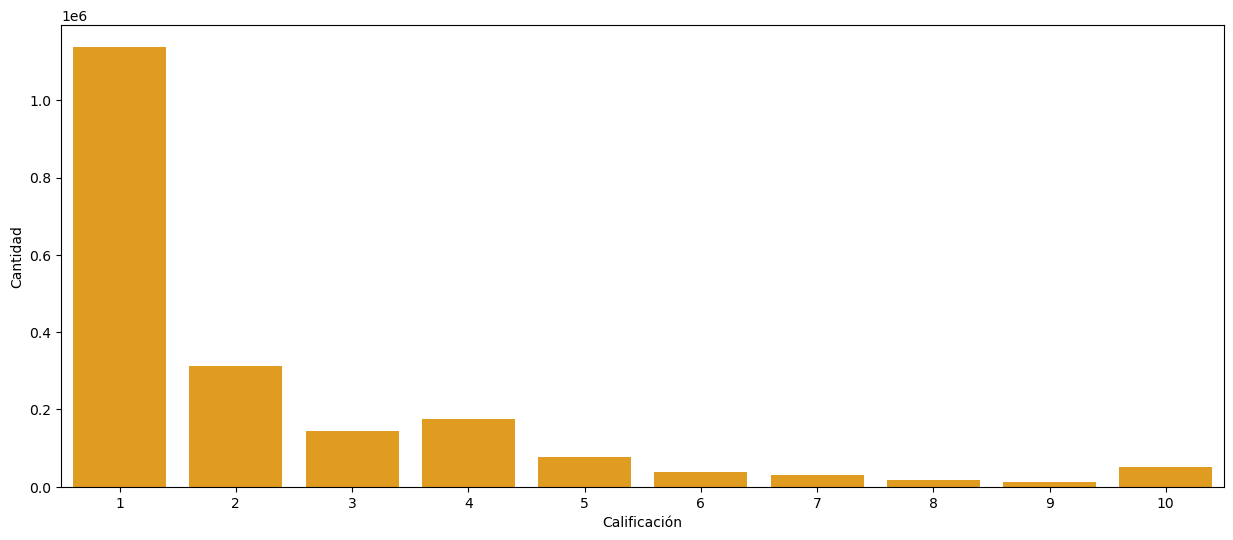

In [172]:
plt.figure(figsize=(15, 6))

sns.barplot(x=d.index, y=d, color='orange')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')

plt.show()

### <font color='#F59B46'>Por ultimo eliminamos la columna 'listen_count' pues ya no nos importa</font>

In [173]:
df = df.drop('listen_count', axis=1)
df.head()

,user_id,song_id,calificacion
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1



### <font color='#F59B46'>Ahora toca dividir nuestros datos, para poder entrenar, testear y validar nuestro modelo</font>

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
df_train, df_val = train_test_split(df, test_size = 0.2, random_state=1)
print(df_train.shape, df_val.shape)

(1600000, 3) (400000, 3)


In [176]:
df_train.head()

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,1
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,1
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,4
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,1
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,1


In [177]:
df_train[["user_id","song_id","calificacion"]]

,user_id,song_id,calificacion
1952144,2ce5b56b6c651accc947db94e5f5b37b51a8b4dc,SOXHIDK12A58A7CFB3,1
767002,a540373b4f88f7a34203ce1c8bbfa0bb56679aaf,SOITJIQ12A8C13A291,1
797412,c6c9c2f0cb0174cc67f4bd803431e709438ba360,SOUSOKG12A58A7AC15,4
1235336,2c460774b978af80929ace6109bbf405c9c872bc,SOWUEQA12A8151BA81,1
1955142,2869bf0c721e75cc0871adb749916085e3ef23f0,SOSHJIH12AF72A1D72,1
...,...,...,...
491263,e6f1dd0b1cb86f83aa056289ef6b83c059064773,SOLQSWM12A6D4FA60D,1
1840200,fe75beb1e8dcba3145048acc92d3f5a94ac0ae5b,SOSJZID12A8C13E802,2
470924,c2ec3f7c38ae13c8819c978d0b33b3c406f11c24,SORKVID12A6D4FC6D2,1
491755,db7c0b803e0a137e8f32ff52c44571960fdc730c,SOOXLKF12A6D4F594A,1


### <font color='#F59B46'>Ya con los datos preparados, es hora de crear la matriz usuarios x canciones, para luego descomponerla mediante SVD en otras 3, las cuales usaremos para nuestro sistema de recomendacion, una para los usuarios, una diagonal y otra para las canciones</font>

### <font color='#F59B46'>Lo antes dicho puede ser "omitido" en codigo, pues usaremos una libreria que crea y descompone la matriz por su cuenta, pero es importante recalcar que es lo que hace, pues asi funciona SVD</font>

# <font color='#AF5500'>Es momento de crear el modelo</font>

In [178]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import cross_validate

reader = Reader(line_format='user item rating', rating_scale=(1, 10))

In [179]:
dataTrain = Dataset.load_from_df(df_train[["user_id","song_id","calificacion"]], reader=reader)
dataTrain = dataTrain.build_full_trainset()

dataTest = Dataset.load_from_df(df_val[["user_id","song_id","calificacion"]], reader=reader)
dataTest = dataTest.construct_testset(dataTest.raw_ratings)

In [180]:
algo = SVD()

algo.fit(dataTrain)

predictions = algo.test(dataTest)

accuracy.rmse(predictions)

RMSE: 1.8350


1.834956489514489

### <font color='#F59B46'>En una escala de 1 a 10, un error de 1.83 puntos es relativamente pequeño, lo que sugiere que el modelo está prediciendo las calificaciones sin llegar a un sobreajuste.</font>

In [181]:
df_val.head()

,user_id,song_id,calificacion
1806398,f74715141f556a690b554e4bda4ec441f976c97d,SOJOIKI12AB0187525,1
422849,36f4f0163fe74c1f88c49b5c79ca00f9fa304d13,SOVBQOM12A8C137B16,1
1772714,a187486100bafebe5264a216d6dfc1646dbd2f03,SOYFNQM12A8C14264B,4
828325,775fb230d87357dbab455808c4ff9831fb65ad46,SOABNPW12A6D4FC9B5,1
659831,76bc893a4163b46d5474d501e1d11456546b50d2,SONUHDN12AB01800D7,1



### <font color='#F59B46'>Probemos una prediccion</font>

In [182]:
user_id = "76bc893a4163b46d5474d501e1d11456546b50d2"
song_id = "SONUHDN12AB01800D7"

In [183]:
pred = algo.predict(user_id, song_id, r_ui=4, verbose=True)
x = [pred.iid, pred.est]
print(f"La calificacion estimada del usuario es {pred[3]}")

user: 76bc893a4163b46d5474d501e1d11456546b50d2 item: SONUHDN12AB01800D7 r_ui = 4.00   est = 2.77   {'was_impossible': False}
La calificacion estimada del usuario es 2.773455112439672


### <font color='#F59B46'>Ahora hagamos el sistema de recomendacion, en el que le damos un usuario y nos recomienda las 10 mejores canciones para dicho usuario</font>

In [184]:
canciones = df["song_id"].unique()
canciones.size

10000

In [185]:
def musicRecommendationSystem(user):
    
    #Obtener los ids de las canciones recomendadas
    idsRecomendadas = []
    for i in range(0,canciones.size):
        pred = algo.predict(user, canciones[i], r_ui=4, verbose=False)
        idsRecomendadas.append([pred.iid, pred.est])
    myvar = pd.DataFrame(idsRecomendadas, columns=['song_id', 'calif']).sort_values(by=['calif'], ascending=False)
    recomendadas = myvar.head(10)
    
    #De los ids, obtener el nombre, album y artista
    song_ids = recomendadas['song_id']
    filtered_songs = df_songs[df_songs['song_id'].isin(song_ids)][['title', 'release', 'artist_name']]
    

    return filtered_songs

### <font color='#F59B46'>Probemoslo con dos usuarios</font>

In [186]:
userPrueba = 'c6c9c2f0cb0174cc67f4bd803431e709438ba360'

musicRecommendationSystem(userPrueba)

,title,release,artist_name
222242,16 Candles,16 Candles,The Crests
301525,Crumpshit,Lonely Day,Philippe Rochard
335297,Right Here Waiting (Single Edit),Playlist: Ballads,Richard Marx
367833,Novocaine,In Search Of Sunrise 5 - Los Angeles,Kalafut
484965,Bros Sto Rimagmeno Spiti (2003 Digital Remaster),50 Hronia Rebetiko Tragoudi,George Dalaras
541316,Colors Of The Wind,The Magic Of Disney,Vanessa Williams
629260,Satisfaction,Hypnotica,Benny Benassi Presents The Biz
771510,Nobody (Featuring Athena Cage) (LP Version),Keith Sweat,Keith Sweat Featuring Athena Cage
888199,Mamma,Tijd,Bram Vermeulen
894992,221,Spun,keller williams


In [187]:
userPrueba1 = '36f4f0163fe74c1f88c49b5c79ca00f9fa304d13'

musicRecommendationSystem(userPrueba1)

,title,release,artist_name
388134,Working With Homesick,Blues On The South Side,Homesick James
484965,Bros Sto Rimagmeno Spiti (2003 Digital Remaster),50 Hronia Rebetiko Tragoudi,George Dalaras
531294,Interactive Halloween Bear,TV Loves You Back,Restiform Bodies
547981,Encore Break,Live At Benaroya Hall - Oct.22_ 2003,Pearl Jam
555899,Como Un Sueño (Am I Dreaming),9 Lives,Kat DeLuna
556707,Death Ain't No Big Deal (Tribute To Jake Hess ...,Tribute To Jake Hess,Jake Hess
573462,Better To Reign In Hell,Damnation And A Day,Cradle Of Filth
762247,Kelma,Made In Medina / Ole Ole,Rachid Taha
797668,Recado Falado (Metrô Da Saudade),2 Em 1,Alceu Valença
894992,221,Spun,keller williams
